## Importing Libraries

In [1]:
!pip install pandas_profiling

You should consider upgrading via the 'c:\users\farah\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

In [3]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

data.drop("sl_no", axis=1, inplace=True)

## Examining Dataset

In [4]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
print (str(data.shape))
print (data.info())

(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [8]:
report = data.profile_report(title='Campus Placement Data - Report',
                             progress_bar=False)
report

## Data Cleaning

In [9]:
data['salary'].fillna(value=0, inplace=True)

data['salary'].isnull().sum()

0

## Exploring Data by each Features

In [10]:
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

C:\Users\Farah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


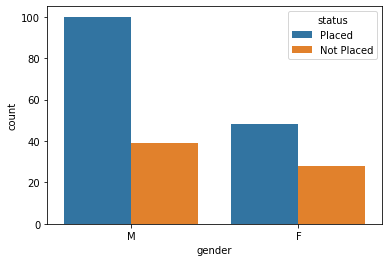

In [11]:
sns.countplot("gender", hue="status", data=data)
plt.show()

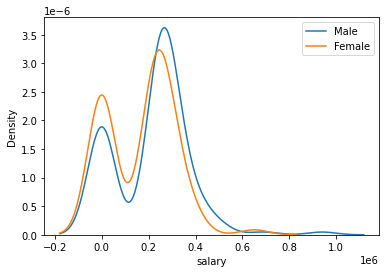

In [12]:
sns.kdeplot(data[data['gender']=='M']['salary'])
sns.kdeplot(data[data['gender']=='F']['salary'])
plt.legend(["Male", "Female"])

plt.show()

## Preprocessing data for classfication models

In [13]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [15]:
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7230769230769231
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        21
           1       0.77      0.84      0.80        44

    accuracy                           0.72        65
   macro avg       0.68      0.66      0.67        65
weighted avg       0.71      0.72      0.71        65



In [24]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8153846153846154
              precision    recall  f1-score   support

           0       0.85      0.52      0.65        21
           1       0.81      0.95      0.88        44

    accuracy                           0.82        65
   macro avg       0.83      0.74      0.76        65
weighted avg       0.82      0.82      0.80        65



In [23]:
# Log Reg
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7846153846153846
              precision    recall  f1-score   support

           0       0.77      0.48      0.59        21
           1       0.79      0.93      0.85        44

    accuracy                           0.78        65
   macro avg       0.78      0.70      0.72        65
weighted avg       0.78      0.78      0.77        65



## Getting ready for deployment

In [27]:
pickle.dump(random_forest, open('model_classifier.pkl','wb'))

In [28]:
import flask

In [29]:
flask.__version__

'1.1.2'